In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
#print(city_data.head())
#print(ride_data.head())
# Combine the data into a single dataset
merged_data = pd.merge(ride_data,city_data,how = 'inner', on = 'city')

# Display the data table for preview
merged_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

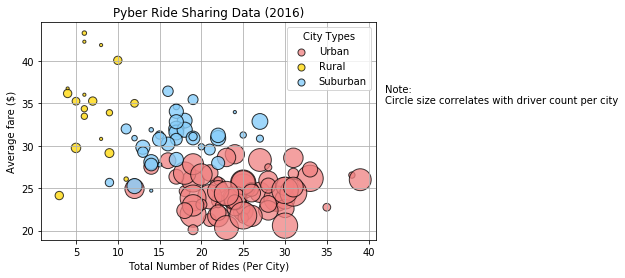

In [13]:
# Obtain the x and y coordinates for each of the three city types

#x cordinate is number of rides per city found using groupby and count function
x_urban = merged_data.loc[merged_data["type"]=='Urban'].groupby(['city'])['ride_id'].count()
x_rural = merged_data.loc[merged_data["type"]=='Rural'].groupby(['city'])['ride_id'].count()
x_suburban = merged_data.loc[merged_data["type"]=='Suburban'].groupby(['city'])['ride_id'].count()

#y cordinage is mean of fare per city found using group by and mean function
y_urban = merged_data.loc[merged_data["type"]=='Urban'].groupby(['city'])['fare'].mean()
y_rural = merged_data.loc[merged_data["type"]=='Rural'].groupby(['city'])['fare'].mean()
y_suburban = merged_data.loc[merged_data["type"]=='Suburban'].groupby(['city'])['fare'].mean()

#size has to be driver count found by mean and then taking squareroot of the same as area is proportional to square of radius
s_urban = merged_data.loc[merged_data["type"]=='Urban'].groupby(['city'])['driver_count'].mean()*10
s_rural = merged_data.loc[merged_data["type"]=='Rural'].groupby(['city'])['driver_count'].mean()*10
s_suburban = merged_data.loc[merged_data["type"]=='Suburban'].groupby(['city'])['driver_count'].mean()*10

s_rural.head()

fig, ax = plt.subplots()
# Build the scatter plots for each city types
ax.scatter(x_urban,y_urban,s=s_urban,alpha=0.75,marker="o",edgecolors = 'black',color = 'lightcoral' , label = 'Urban')
ax.scatter(x_rural,y_rural,s=s_rural,alpha=0.75,marker="o", edgecolors = 'black',color = 'gold', label = 'Rural')
ax.scatter(x_suburban,y_suburban, s= s_suburban, marker="o",alpha =0.80,edgecolors = 'black', color = 'lightskyblue', label = 'Suburban' )

# Incorporate the other graph properties
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average fare ($)')
ax.set_title('Pyber Ride Sharing Data (2016)')

ax.grid(True)

# Create a legend
lgd = ax.legend(title = 'City Types')
#setting size for legend handle to reflect uniform size
for i in range(3):
    lgd.legendHandles[i]._sizes = [50]


# Incorporate a text label regarding circle size
ax.text(42,35,"Note:\nCircle size correlates with driver count per city")


# Save Figure
plt.savefig("Pyber Ride Sharing Data.png")



In [15]:
# Show plot
plt.show()

## Total Fares by City Type

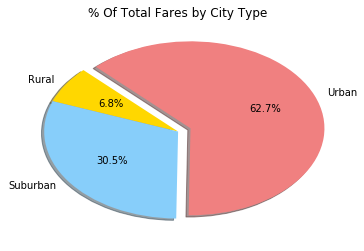

In [4]:
# Calculate Type Percents
total_fare = merged_data.groupby(['type'])[['fare']].sum()
#print(total_fare)
label = total_fare.index.tolist()
#print(label)

# Build Pie Chart
fig, ax = plt.subplots()
ax.pie(total_fare, labels = label, colors = ['gold','lightskyblue','lightcoral'],autopct='%1.1f%%', counterclock = True, explode =[0,0,.1],startangle = 135,shadow = True)

# Save Figure
ax.set_title('% Of Total Fares by City Type')
plt.savefig("Percentage of Total Fares by City Type.png")




In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

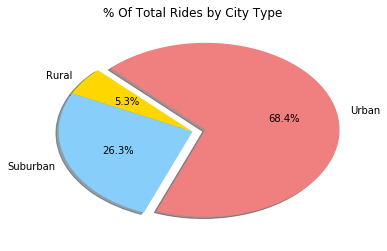

In [6]:
# Calculate Ride Percents
total_ride = merged_data.groupby(['type'])[['ride_id']].count()
label = total_ride.index.tolist()

# Build Pie Chart
fig, ax = plt.subplots()
ax.pie(total_ride, labels = label, colors = ['gold','lightskyblue','lightcoral'],autopct='%1.1f%%', counterclock = True, explode =[0,0,.1],startangle = 135,shadow = True)

# Save Figure
ax.set_title('% Of Total Rides by City Type')
plt.savefig("Percentage of Total Rides by City Type.png")


In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

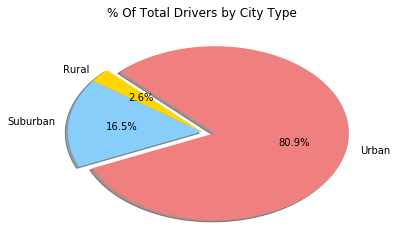

In [8]:
# Calculate Driver Percents
total_drivers = city_data.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
fig, ax = plt.subplots()
ax.pie(total_drivers, labels = label, colors = ['gold','lightskyblue','lightcoral'],autopct='%1.1f%%', counterclock = True, explode =[0,0,.1],startangle = 135,shadow = True)


# Save Figure
ax.set_title('% Of Total Drivers by City Type')
plt.savefig("Percentage of Total Drivers by City Type.png")



In [9]:
# Show Figure
plt.show()